In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import OneHotEncoder

In [3]:
df = pd.read_csv('../data/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
len(df)

20640

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
num_cols, cat_cols = df.select_dtypes(include=['number']).columns, df.select_dtypes(include=['object']).columns

In [7]:
# EDA - Numeric Columns
# ---------------------

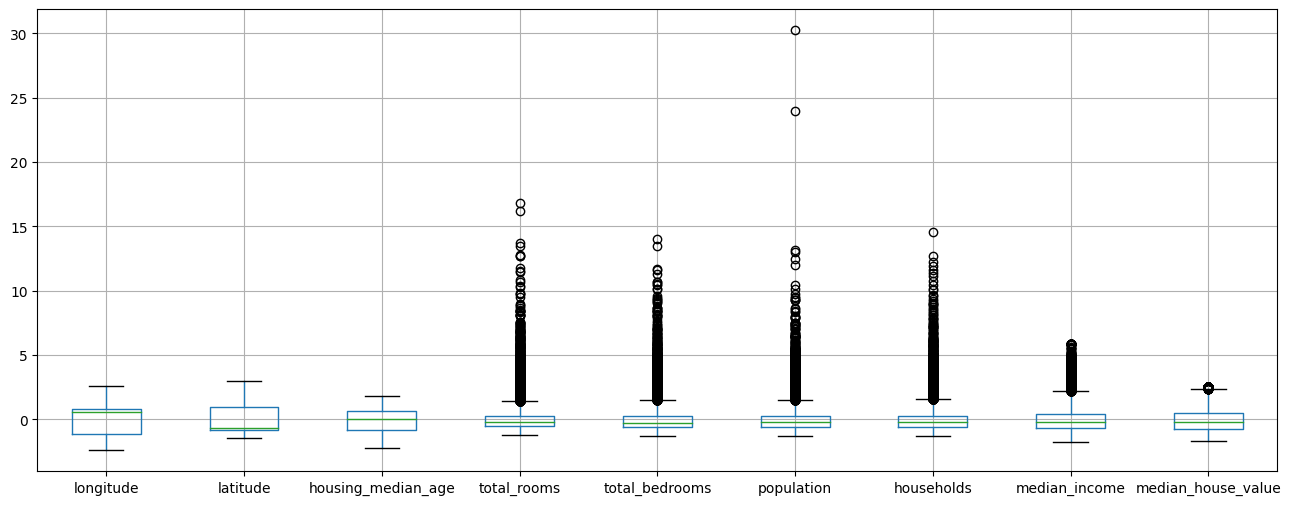

In [8]:
# 1. Box plots to see variations
X_std = (df[num_cols] - df[num_cols].mean())/df[num_cols].std()
X_std.boxplot(figsize=(16, 6))
plt.show()

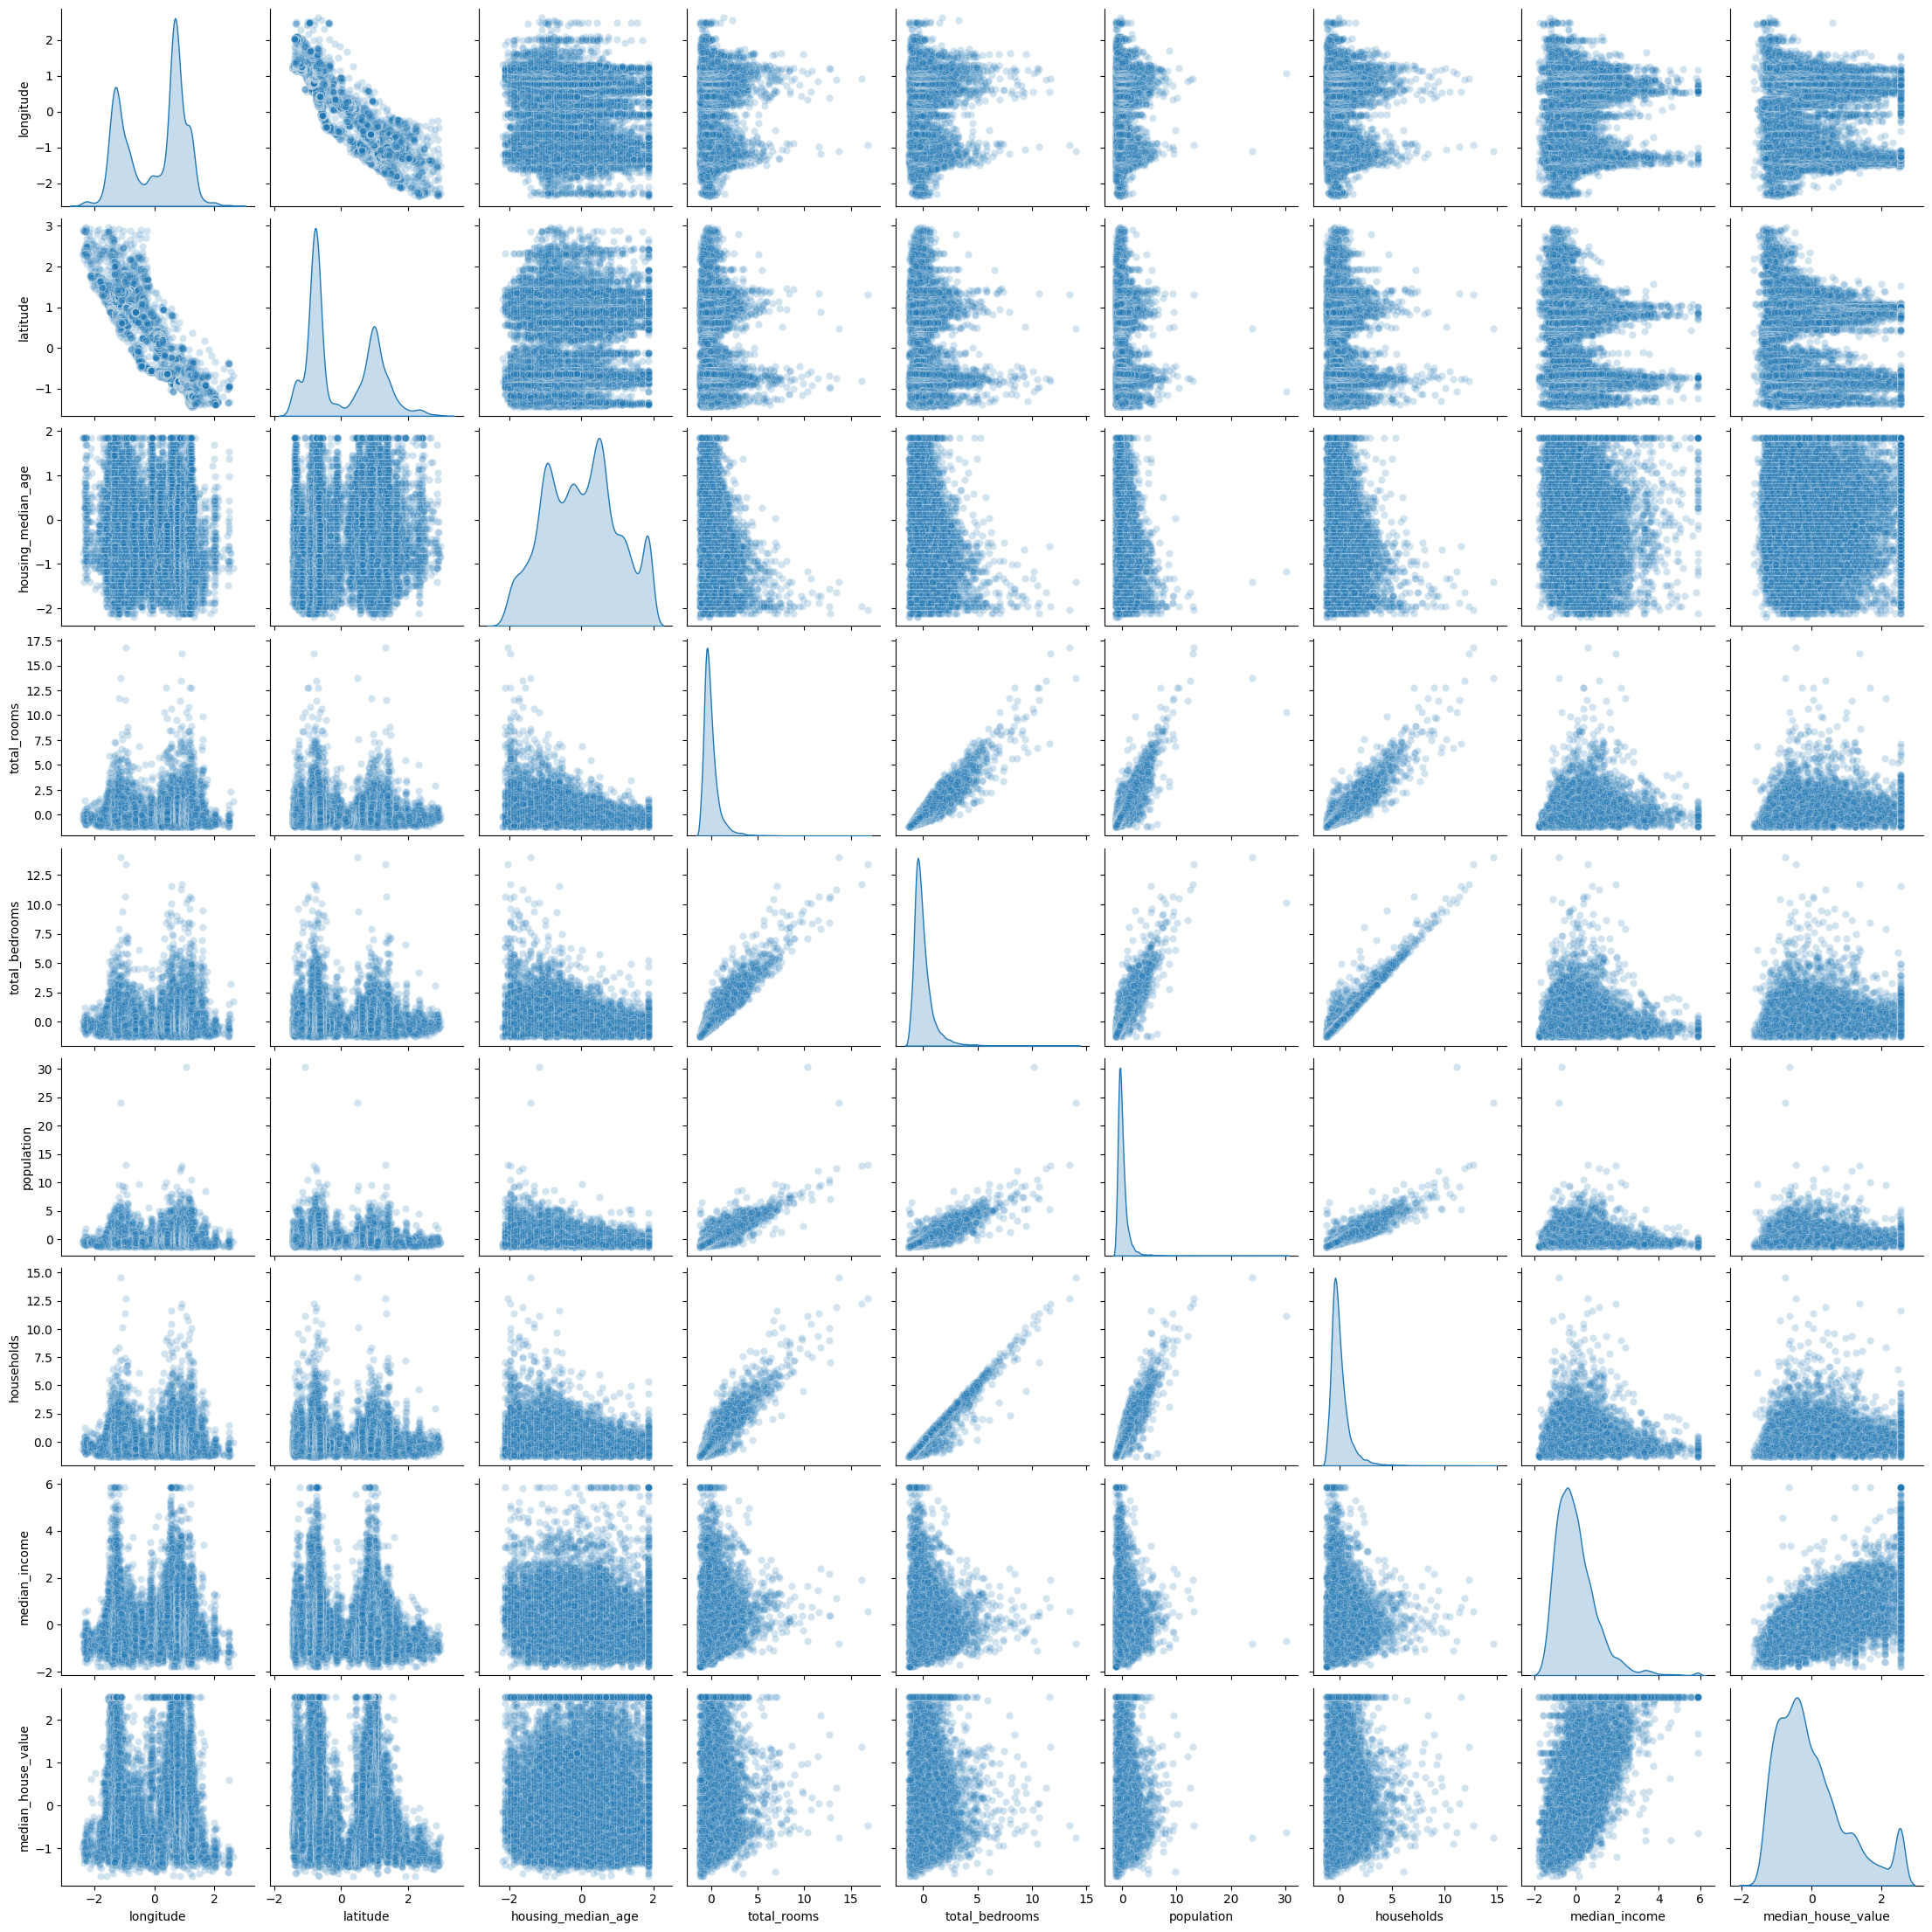

In [9]:
target_var = "median_house_value"
sns.pairplot(X_std, diag_kind='kde', plot_kws={'alpha': 0.2})
plt.show()

In [10]:
corr = X_std.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [33]:
features = ['latitude', 'housing_median_age', 'total_rooms', 'median_income']
target = 'median_house_value'

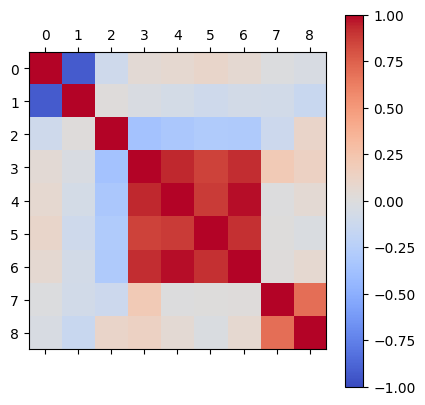

In [12]:
cax = plt.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(cax)
plt.show()

In [13]:
## Percentage of outliers
outliers = {}

for col in num_cols:

    Q1 = X_std[col].quantile(0.25)
    Q3 = X_std[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    print(f"Outliers {col} : {round(len(X_std[(X_std[col] < lower_bound) | (X_std[col] > upper_bound)]) * 100/len(X_std), 2)}%")

Outliers longitude : 0.0%
Outliers latitude : 0.0%
Outliers housing_median_age : 0.0%
Outliers total_rooms : 6.24%
Outliers total_bedrooms : 6.16%
Outliers population : 5.79%
Outliers households : 5.91%
Outliers median_income : 3.3%
Outliers median_house_value : 5.19%


In [14]:
## Categorical Features

In [15]:
df.groupby('ocean_proximity').size()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
dtype: int64

In [19]:
cat_cols

Index(['ocean_proximity'], dtype='object')

In [22]:
n_rows, n_cols

(1, 3)

In [23]:
df[target]

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

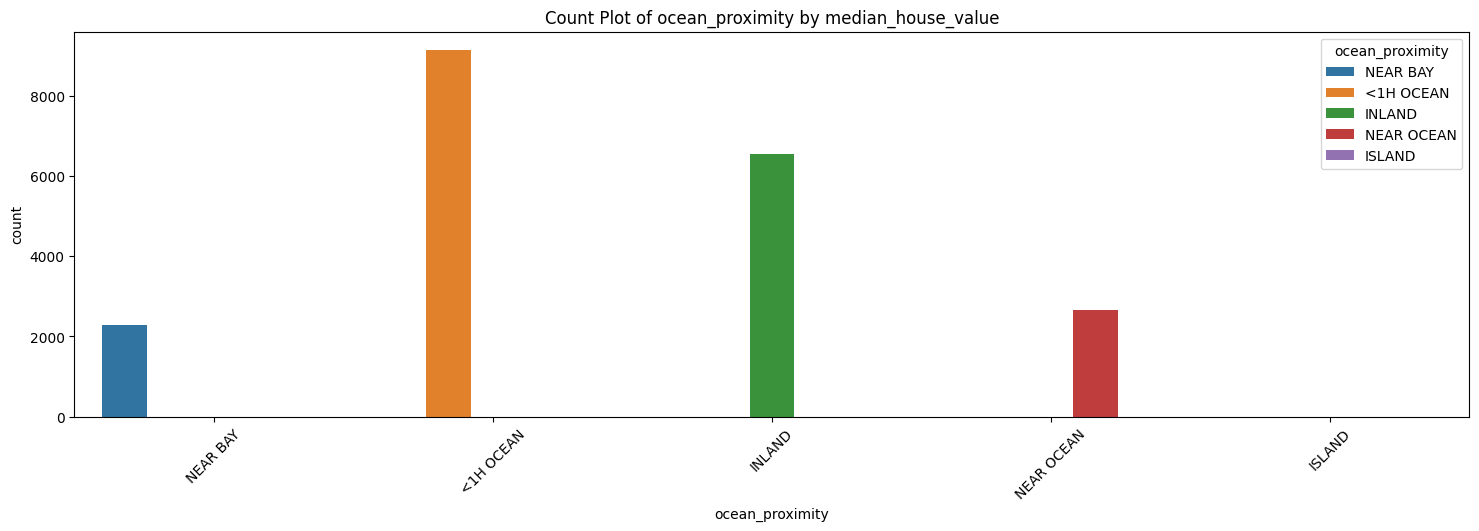

In [26]:
import numpy as np

n_cols = 1
n_rows = 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = np.array(axes).flatten()

for i, col in enumerate(cat_cols):
    
    sns.countplot(x=col, hue=col, data=df, ax=axes[i])
    axes[i].set_title(f"Count Plot of {col} by {target}")
    axes[i].tick_params(axis='x', rotation=45)
    
plt.show()

In [28]:

from scipy.stats import chi2_contingency

chi2_p = {}

for col in cat_cols:
    contingency_table = pd.crosstab(df[col], 
                                    df[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_p[col] = p

chi2_p

{'ocean_proximity': 2.254202724527952e-140}

In [38]:
X = pd.concat([X_std[features], df[cat_cols]], axis=1)

In [40]:
y = df[target]

In [41]:
from sklearn.model_selection import train_test_split

In [43]:
# Split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.1
)

len(X_train), len(X_test), len(X_val)

(14860, 4128, 1652)

In [45]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_absolute_error

from sklearn.pipeline import Pipeline

In [46]:
preprocessors = ColumnTransformer(
    transformers=[
        ('num', )
    ]
)

models = [
    LinearRegression(),
    RandomForestRegressor(),
    XGBRegressor()
]

